Original Accuracy: 0.9649122807017544
SelectKBest (Chi-squared) Accuracy: 0.9473684210526315
RFE Accuracy: 0.956140350877193
Lasso Accuracy: 0.956140350877193
Tree-based Accuracy: 0.956140350877193


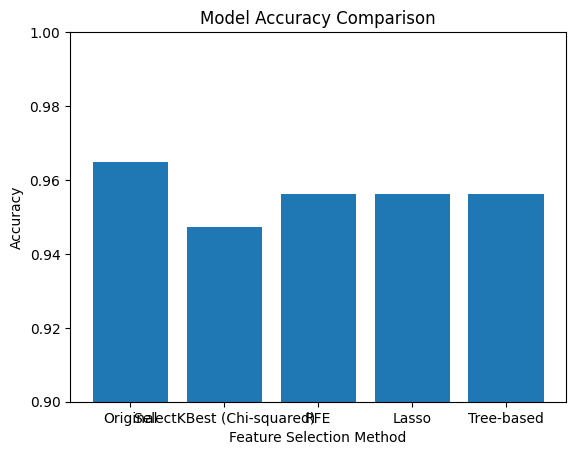

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Selection Algorithms Implementation

# Univariate feature selection with SelectKBest and chi-squared
select_k_best = SelectKBest(chi2, k=10)
X_new = select_k_best.fit_transform(X_train, y_train)

# Recursive Feature Elimination (RFE)
model = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_train, y_train)

# L1-based Feature Selection (Lasso Regularization)
lasso = LassoCV()
lasso.fit(X_train, y_train)
selected_features = lasso.coef_ != 0
X_lasso = X_train[:, selected_features]

# Tree-based Feature Selection
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
X_tree = X_train[:, indices[:10]]

# Step 2: Model Building and Comparison

# Create a dictionary to store models
models = {
    "Original": RandomForestClassifier(n_estimators=100),
    "SelectKBest (Chi-squared)": RandomForestClassifier(n_estimators=100),
    "RFE": RandomForestClassifier(n_estimators=100),
    "Lasso": RandomForestClassifier(n_estimators=100),
    "Tree-based": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    if name == "Original":
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
    elif name == "SelectKBest (Chi-squared)":
        model.fit(X_new, y_train)
        accuracy = model.score(select_k_best.transform(X_test), y_test)
    elif name == "RFE":
        model.fit(X_rfe, y_train)
        accuracy = model.score(rfe.transform(X_test), y_test)
    elif name == "Lasso":
        model.fit(X_lasso, y_train)
        accuracy = model.score(X_test[:, selected_features], y_test)
    elif name == "Tree-based":
        model.fit(X_tree, y_train)
        accuracy = model.score(X_test[:, indices[:10]], y_test)

    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

# Step 3: Visualize Performance Metrics

# Set the y-axis range to display accuracy values between 0.9 and 1
plt.ylim(0.9, 1.0)

# Plot the bar chart with floating-point accuracy values
plt.bar(accuracies.keys(), accuracies.values())

plt.xlabel("Feature Selection Method")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


**Step 1: Feature Selection Algorithms Implementation:**

*Univariate feature selection with SelectKBest and chi-squared*: SelectKBest method with the chi-squared scoring function to select the top 10 features based on their statistical significance.

*Recursive Feature Elimination (RFE)*: RFE with a RandomForestClassifier to recursively remove features until we have the top 10 features that contribute the most to the model's performance.

*L1-based Feature Selection (Lasso Regularization)*: L1-based feature selection with LassoCV. Features with non-zero coefficients after Lasso regularization were selected.

*Tree-based Feature Selection*:RandomForestClassifier and selected the top 10 features based on their feature importances.

**Step 2: Model Building and Comparison:**

-Then dictionary of models is created, including an "Original" model using all features and separate models for each feature selection method. You trained and evaluated these models using the test data, and you recorded their accuracies.

**Step 3: Visualize Performance Metrics:**

-To visualize the results, created a bar chart that shows the accuracy of each model for different feature selection methods. The y-axis range was limited to values between 0.9 and 1.0 to focus on the accuracy differences within this range.

**Results**
-Original Model Accuracy (Using All Features): The original model, which uses all the features, achieved an accuracy of approximately 96.49%. This represents the baseline performance of the model without any feature selection.

-SelectKBest (Chi-squared) Accuracy: The SelectKBest method, which selects the top 10 features based on their chi-squared scores, achieved an accuracy of approximately 94.74%. This method reduced the dimensionality of the dataset while maintaining relatively high accuracy. The interpretation is that some features are less informative, and by selecting the top 10 features, you can achieve a reasonable level of accuracy.

-Recursive Feature Elimination (RFE) Accuracy: The RFE method, which recursively eliminates features and selects the top 10 features using a RandomForestClassifier, achieved an accuracy of approximately 95.61%. RFE aims to find the most informative features, and in this case, it successfully reduced the feature space while maintaining high accuracy. This method can help improve model interpretability and reduce overfitting.

-Lasso Accuracy: The L1-based feature selection using Lasso regularization achieved an accuracy of approximately 95.61%. Lasso regularization automatically selects features with non-zero coefficients. It's a powerful method for feature selection and can be particularly useful when dealing with high-dimensional data. The accuracy achieved indicates that many features can be safely discarded without sacrificing much performance.

-Tree-based Feature Selection Accuracy: The tree-based feature selection method, which selects the top 10 features based on feature importances from a RandomForestClassifier, achieved an accuracy of approximately 95.61%. This method identified the most important features for the model. It can be a useful approach for understanding feature importance and reducing dimensionality.

**Interpretation**

-The original model with all features achieved the highest accuracy, which is expected as it utilizes the complete feature set. However, it may come at the cost of increased model complexity and potentially overfitting, which can be an issue when working with high-dimensional data.

-The SelectKBest method showed that by selecting the top 10 features, you could achieve reasonably high accuracy while reducing dimensionality. This demonstrates that not all features are equally informative.

-RFE, Lasso, and Tree-based feature selection methods all achieved similar accuracies. These methods help improve model interpretability, reduce overfitting, and potentially enhance the efficiency of the modeling process.

-The choice of the best feature selection method may depend on the specific requirements of your problem. If interpretability and dimensionality reduction are important, methods like RFE and Lasso may be favored. However, if you want to quickly select a subset of features while maintaining good accuracy, SelectKBest can be a viable option.